# Исследование особенностей вакансий для Аналитиков данных и Системных аналитиков

**Цель исследования:** выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

Исследование базируется на данных, полученных с портала HH.ru

**Содержание**
* [1. Обзор данных](#section_1)
* [2. Предобработка данных](#section_2)
    * [2.1 Объединение данных](#section_2_1)
    * [2.2 Изменение типов данных](#section_2_2)
    * [2.3 Обработка дубликатов](#section_2_3)
        * [2.3.1 Полные дубликаты](#section_2_3_1)
        * [2.3.2 Повторно опубликованные вакансии](#section_2_3_2)
        * [2.3.3 Явные и неявные дубликаты](#section_2_3_3)
    * [2.4 Обработка пропусков](#section_2_4)
        * [2.4.1 Обзор пропусков в датасете](#section_2_4_1)
        * [2.4.2 Пропуски в столбцах с навыками](#section_2_4_2)
* [3. Исследовательский анализ данных](#section_3)
    * [3.1 Соотношение типов вакансий в датасете](#section_3_1)
    * [3.2 Определение доли грейдов среди вакансий](#section_3_2)
    * [3.3 Определение типичного места работы](#section_3_3)
        * [3.3.1 Топ-10 работодателей](#section_3_3_1)
        * [3.3.2 Уровень заработной платы](#section_3_3_2)
        * [3.3.3 Тип занятости](#section_3_3_3)
        * [3.3.4 График работы](#section_3_3_4)
    * [3.4 Определение наиболее востребованных навыков](#section_3_4)
        * [3.4.1 Соотношение "твердых" и "мягких" навыков](#section_3_4_1)
        * [3.4.2 Соотношение количества требований](#section_3_4_2)
        * [3.4.3 Наиболее востребованные навыки](#section_3_4_3)
* [4. Выводы и рекомендации](#section_4)

## 1. Обзор данных <a id="section_1"></a>

**Описание полей в данных**
- `id` - Уникальный идентификатор вакансии
- `name` - Название вакансии
- `published_at` - Дата публикации
- `alternate_url` - Ссылка на вакансию
- `type` - Статус вакансии на момент получения данных от api и их в базу
- `employer` - Работодатель
- `department` - Работодатель, отдел
- `area` - Регион места работы
- `experience` - Требуемый опыт работы
- `key_skills` - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api
- `schedule` - График работы
- `employment` - Тип занятости
- `description` - Описание вакансии
- `description_lemmatized` - Лемматизированное описание вакансии
- `salary_from` - Нижняя граница предлагаемой заработной платы
- `salary_to` - Верхняя граница предлагаемой заработной платы
- `salary_bin` - Категория зарплаты
- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills
- `hard_skills_from_description` - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. 
- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api

In [56]:
# Импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Зададим общий стиль всех графиков в проекте
plt.style.use('ggplot')

In [3]:
# Прочитаем датасеты
# Источник - https://disk.yandex.ru/d/eA4zuI8qPag-KQ
vacancies_sa = pd.read_excel('vacancies_sa.xlsx')
vacancies_da = pd.read_excel('vacancies_da (1).xlsx')

In [4]:
vacancies_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

In [5]:
vacancies_sa.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [6]:
vacancies_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [7]:
vacancies_da.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


Из общей информации, выведенной методом info(), можно сделать следующие выводы:
- У нас имеется две таблицы с данными о вакансиях для аналитиков данных и системных аналитиков. Для удобства работы, мы их объединим на этапе предобработки данных.
- Таблицы одинаковые по своему составу, но различны по количеству вакансий.
- В обеих таблицах имеются пропуски, которые мы будем обрабатывать на этапе предобработки.

## 2. Предобработка данных <a id="section_2"></a>

### 2.1 Объединение данных <a id="section_2_1"></a>

In [8]:
# Объединим обе таблицы в один датасет
vacancies_sa['src'] = 'Системный аналитик'
vacancies_da['src'] = 'Аналитик данных'
vacancies = pd.concat([vacancies_sa, vacancies_da])
vacancies.head(6)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,src
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,Системный аналитик
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,Системный аналитик
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация,Системный аналитик
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",...,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,Системный аналитик
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",...,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,Системный аналитик
5,100065546,Системный аналитик ЦФТ-Банк,2024-07-09 10:42:25,https://hh.ru/vacancy/100065546,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Junior+ (1-3 years),"['MS SQL', 'Документация', 'ЦФТ', 'BPMN']",...,Полная занятость,ищем системного аналитика цфт! в небольшую ски...,искать системный аналитик цфт небольшой скилло...,NaN,NaN,ЗП не указана,"ЦФТ, BPMN, MS SQL",NaN,Документация,Системный аналитик


### 2.2 Изменение типов данных <a id="section_2_2"></a>

In [9]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null   obj

Из общей информации видно, что типы данных соответствуют представленным данным. Поэтому корректировать типы данных мы не будем.

### 2.3 Обработка дубликатов <a id="section_2_3"></a>

#### 2.3.1 Полные дубликаты <a id="section_2_3_1"></a>

In [10]:
# Проверим наличие полных дубликатов, т.е. дубликатов по всем столбцам одновременно
vacancies.duplicated().sum()

0

Полные дубликаты отсутствуют

#### 2.3.2 Повторно опубликованные вакансии <a id="section_2_3_2"></a>

In [11]:
# Проверим количество повторно опубликованных вакансий
dublicates_filter_id = vacancies.duplicated(subset='id').sum()
# Посмотрим на найденные дубликаты
dublicates_filter_id

5

In [12]:
# Список дублирующихся id
duples_list = vacancies[vacancies.duplicated(subset='id')]['id']
display(duples_list)

102     100581829
103     100581830
104     100581831
344      85053195
1461     98441008
Name: id, dtype: int64

In [13]:
# Посмотрим на вакансии с одинаковам id
vacancies.query('id in @duples_list').sort_values(by=['id', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,src
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,Аналитик данных
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,Системный аналитик
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,Аналитик данных
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,Системный аналитик
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Аналитик данных
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Системный аналитик
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,Аналитик данных
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,Системный аналитик
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,Аналитик данны

Из таблицы видим, что одна и таже вакансия с одиноковым `id` присутствовала в обоих исходных датасетках - и с вакансиями системных аналитиков и с вакансиями аналитиков данных. Это нормально и удалть такие дубли не будем. Подобные пары не являются повторно опубликованными.

In [14]:
# Продолжаем искать повторно опубликованные вакансии
# В подобных вакансиях все данные будут одинаковые, кроме полей id, published_at и alternate_url
vacancies[vacancies.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_bin', 'src'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,src
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,Аналитик данных
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,Аналитик данных
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,Аналитик данных
1345,97831652,Data Analyst,2024-04-24 16:47:53,https://hh.ru/vacancy/97831652,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,Аналитик данных
528,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,Аналитик данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,96494928,Старший аналитик данных (маркетинг),2024-04-09 09:38:57,https://hh.ru/vacancy/96494928,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Middle (3-6 years),"['SQL', 'Python', 'Маркетинг, реклама, PR', 'М...",...,Полная занятость,чем предстоит заниматься: отслеживать и собир...,предстоять заниматься отслеживать собирать раз...,NaN,NaN,ЗП не указана,"Маркетинг, реклама, PR, аналитика данных, Pyth...",Pandas,NaN,Аналитик данных
819,95548988,Урбан-аналитик данных,2024-03-26 15:33:29,https://hh.ru/vacancy/95548988,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,Аналитик данных
1747,99737480,Урбан-аналитик данных,2024-06-08 17:13:09,https://hh.ru/vacancy/99737480,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,Аналитик данных
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,Аналитик данных


In [15]:
# Зафиксируем количество строк до удаления дублей
vacancies_after_drop = vacancies.shape[0]

In [16]:
# Удалим дубликаты
vacancies = vacancies.drop_duplicates(
  subset=['name', 'type', 'employer', 'department',
          'area', 'experience', 'key_skills', 'schedule',
          'employment', 'description', 'salary_bin', 'src'],
  keep='last'
)

In [17]:
# Убедимся, что дубликаты удалены
vacancies[vacancies.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_bin', 'src'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,src


In [18]:
# Посчитаем какой процент данных мы удалили
print(f'Процент удаленных данных: {(vacancies_after_drop - vacancies.shape[0]) / vacancies_after_drop:.2%}')   

Процент удаленных данных: 5.97%


#### 2.3.3 Явные и неявные дубликаты <a id="section_2_3_3"></a>

In [19]:
# Вывод уникальных значений регионов
vacancies['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново (Ивановская область)',
       'Вологда', 'Йошкар-Ола', 'Рязань', 'Владимир', 'Тамбов', 'Орел',
       'Тула', 'Красноярск', 'Киров (Кировская область)', 'Ульяновск',
       'Красногорск', 'Сургут', 'Белорецк', 'Ярославль', 'Брянск',
       'Чебоксары', 'Волгоград', 'Адлер', 'Саранск', 'Набережные Челны',
       'Севастополь', 'Мытищи', 'Дзержинск (Нижегородская область)',
       'Иннополис', 'Хабаровск', 'Таганрог', 'Иркутск', 'Улан-Удэ',
       'Петрозаводск', 'Магнито

Данные по регионам внесены корректно.

In [20]:
# Посчитаем количество уникальных категорий по опыту работы
vacancies['experience'].value_counts()

experience
Junior+ (1-3 years)      1818
Middle (3-6 years)       1410
Junior (no experince)     211
Senior (6+ years)          55
Name: count, dtype: int64

Названия категорий по опыту работы указаны корректно

In [21]:
# График работы
vacancies['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

In [22]:
# Тип занятости
vacancies['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

In [23]:
# Посмотрим количество уникальных названий вакансий
vacancies['name'].nunique()

1574

In [24]:
vacancies['name'].value_counts()

name
Системный аналитик                                           564
Аналитик данных                                              409
Data Analyst                                                  80
Системный аналитик 1С                                         62
Ведущий системный аналитик                                    48
                                                            ... 
Системный аналитик 1C (ТМЦ, ОС и НМА)                          1
Системный аналитик (ЛК УЦ)                                     1
Бизнес/Системный аналитик стрима "Аналитика и отчетность"      1
Системный Аналитик 1С (УТ 11, Розница)                         1
Ведущий системный аналитик Microsoft Dynamics Navision         1
Name: count, Length: 1574, dtype: int64

In [25]:
# Посмотрим количество уникальных грейдов по уровню зарплат
vacancies['salary_bin'].value_counts()

salary_bin
ЗП не указана                3003
От 100 тысяч до 200 тысяч     168
От 200 тысяч до 300 тысяч     115
Больше 300 тысяч              106
Меньше 100 тысяч              102
Name: count, dtype: int64

Названия категорий грейдов по уровню зарплат указаны корректно

### 2.4 Обработка пропусков <a id="section_2_4"></a>

In [26]:
# Вычислим контрольный размер датасета до преобразования
len(vacancies)

3494

#### 2.4.1 Обзор пропусков в датасете <a id="section_2_4_1"></a>

In [27]:
# Выведем количество пропущенных значений для каждого столбца
vacancies.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          2699
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         2822
salary_to                           3003
salary_bin                             0
key_skills_from_key_skills_field    1255
hard_skills_from_description        2561
soft_skills_from_description        1552
src                                    0
dtype: int64

Из выведенной информации видно, что пропусков много и имеются в следующих столбцах:
- `department` — Работодатель, отдел,
- `salary_from` - Нижняя граница предлагаемой заработной платы,
- `salary_to` - Верхняя граница предлагаемой заработной платы,
- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills,
- `hard_skill _from_description` - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api,
- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

Больше всего пропусков в столбцах с верхней и нижней границей предлагаемой заработной платы. Предложить логичную замену пропусков в этом столбце мы не можем, также как и удалить их. Поэтому будем анализировать имеющиеся данные.
Рассмотрим подробнее пропуски в других столбцах.

#### 2.4.2 Пропуски в столбцах с навыками <a id="section_2_4_2"></a>

In [28]:
vacancies[['key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description']].isna().sum()

key_skills_from_key_skills_field    1255
hard_skills_from_description        2561
soft_skills_from_description        1552
dtype: int64

In [29]:
# Проверим есть ли вакансии у которых заполнено значение в столбце 'key_skills', 
# но пропуск в столбце'key_skills_from_key_skills_field'.
(vacancies.query('key_skills_from_key_skills_field.isna() & key_skills.notna()')
[['key_skills', 'key_skills_from_key_skills_field']]
 ).count()

key_skills                          1255
key_skills_from_key_skills_field       0
dtype: int64

In [30]:
# Напишем функцию для приведения значения в столбце 'key_skills' к формату, как в столбце 'key_skills_from_key_skills_field'
def clean_up(x):
    res = x.replace('"', '').replace('[', '').replace(']', '').replace("'", "")
    return res

In [31]:
# Приведем значения в столбце 'key_skills' к типу "строка" и удалим лишние символы
vacancies['key_skills'] = vacancies['key_skills'].apply(clean_up)
     

In [32]:
# Проверим какими значениями заполнены поля
vacancies['key_skills'].value_counts()

key_skills
                                                                                                                                                          457
Документация                                                                                                                                              248
confluence, Документация                                                                                                                                  112
Pandas                                                                                                                                                     73
confluence                                                                                                                                                 60
                                                                                                                                                         ... 
Разработка технических заданий, Системный

In [33]:
# Заполним пропуски в столбце "key_skills_from_key_skills_field" значениями из столбца "key_skills"
vacancies.loc[(vacancies['key_skills_from_key_skills_field'].isna()) & (vacancies['key_skills'] != ''), 'key_skills_from_key_skills_field'] = \
vacancies.loc[(vacancies['key_skills_from_key_skills_field'].isna()) & (vacancies['key_skills'] != ''), 'key_skills']
     

In [34]:
# Проверим оставшееся количество пропусков
vacancies['key_skills_from_key_skills_field'].isna().sum()

457

In [35]:
# Проверим какими значениями заполнены пропуски
vacancies['key_skills_from_key_skills_field'].value_counts()

key_skills_from_key_skills_field
Документация                                                                                                      248
confluence, Документация                                                                                          112
Pandas                                                                                                             73
confluence                                                                                                         60
Аналитическое мышление                                                                                             54
                                                                                                                 ... 
SQL, UML, BPMN, Agile, API, XML, JSON, Xsd                                                                          1
SQL, Работа с базами данных, REST API, SOAP, UML, BPMN, Scrum, Agile                                                1
Системный анализ, Разра

In [36]:
# Посчитаем долю незаполненных навыков
vacancies[[
    'key_skills_from_key_skills_field',
    'hard_skills_from_description', 
    'soft_skills_from_description'
]].isna().mean()*100

key_skills_from_key_skills_field    13.079565
hard_skills_from_description        73.297081
soft_skills_from_description        44.419004
dtype: float64

Видим следующее количество пропусков:
 - ключевые навыки - не заполнено 13%
 - хард скилы - не заполнено 73,3%
 - софт скилы - не заполнено 44,4%
 
Далее при анализе будем учитывать ключевые навыки, как на наиболее заполненный столбец

## 3. Исследовательский анализ данных <a id="section_3"></a>

### 3.1 Соотношение типов вакансий в датасете <a id="section_3_1"></a>

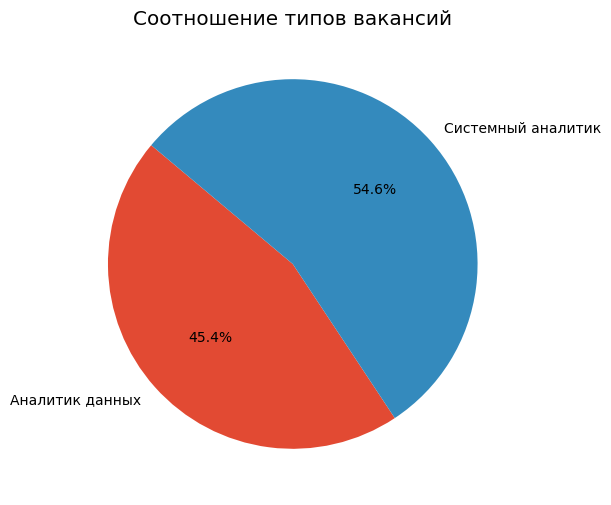

src
Аналитик данных       1587
Системный аналитик    1907
Name: count, dtype: int64

In [37]:
# Подсчет количества каждой категории в столбце 'sourse'
df = vacancies['src'].value_counts().sort_index()

# Создание круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(df, labels=['Аналитик данных', 'Системный аналитик'], autopct='%1.1f%%', startangle=140)
plt.title('Соотношение типов вакансий')
plt.show()

display(df)

Содержание в датасете вакансий для Системных аналитиков превышает на 9% по сравнению с количеством вакансий для Аналитиков данных.

### 3.2 Определение доли грейдов среди вакансий <a id="section_3_2"></a>

Определим доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.<br>
Названия грейдов возьмем из колонки `experience` - "Требуемый опыт работы", которая не содержит пропусков.<br>
Извлекать грейды из названия вакансии не потребуется.

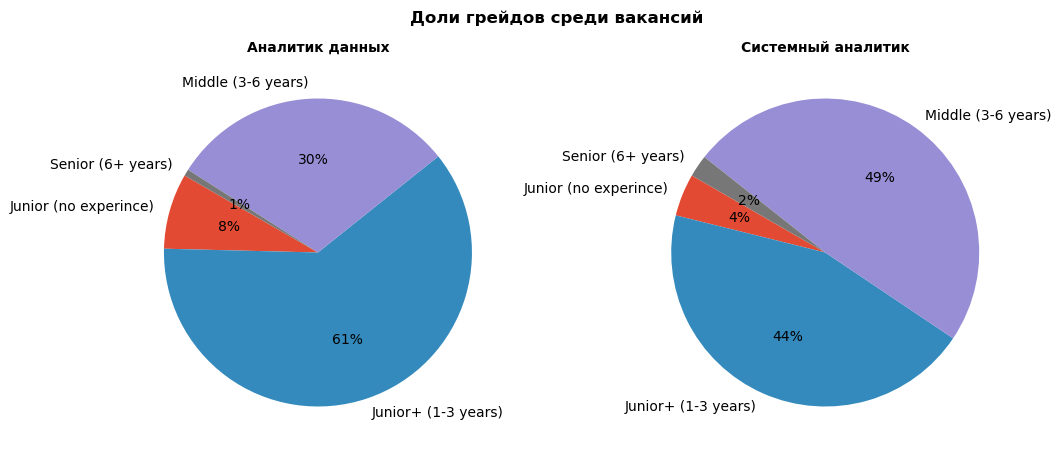

In [38]:
# Разделим данные по Системным аналитикам и Аналитикам данных
da_df = vacancies.loc[vacancies['src'] == 'Аналитик данных']['experience'].value_counts().sort_index()
sa_df = vacancies.loc[vacancies['src'] == 'Системный аналитик']['experience'].value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Отрисуем круговую диаграмму по аналитикам данных
ax[0].pie(da_df,
          labels= [title for title, value in da_df.items()],          
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10})
ax[0].set_title('Аналитик данных', fontsize=10, fontweight='bold')

# Отрисуем круговую диаграмму по системным аналитикам
ax[1].pie(sa_df,
       labels= [title for title, value in sa_df.items()],       
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10})
ax[1].set_title('Системный аналитик', fontsize=10, fontweight='bold')

plt.suptitle('Доли грейдов среди вакансий', fontsize=12, fontweight='bold')
plt.show()

- Наибольшая потребность на должность Аналитик данных в специалистах грейда **Junior+** с опытом от 1 до 3 лет
- А вот системные аналитики требуются в основном на грейд **Middle** с опытом от 3 до 6 лет
- Для обеих профессий наблюдается минимальная потребность в специалистах без опыта

### 3.3 Определение типичного места работы <a id="section_3_3"></a>

Определим типичные места работы для Аналитика данных и Системного аналитика по следующим параметрам: 
- ТОП-работодателей
- Зарплата
- Тип занятости
- График работы

Исследовать будем отдельно грейды Junior, Junior+, Middle и Senior.

In [39]:
# Функция сегментации на грейды с построением графиков
def charts_per_grade(df, attribute, title, ylabel):
    fig, ax = plt.subplots(4, 2, figsize=(15, 15))
    plt.suptitle(title, fontsize=16, fontweight='bold')
    experience = ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'] 
    experience_short = ['Junior', 'Junior+', 'Middle', 'Senior']

    for i in range(len(experience)):
      da = (df.loc[(df['src'] == 'Аналитик данных') & (df['experience'] == f'{experience[i]}'), attribute]
          .value_counts()).reset_index().head(10)
      sa = (df.loc[(df['src'] == 'Системный аналитик') & (df['experience'] == f'{experience[i]}'), attribute]
          .value_counts()).reset_index().head(10)

      # График для аналитиков данных
      sns.barplot(x='count', y=attribute, data=da, ax=ax[i,0], color='slateblue')
      ax[i,0].set_title(f"Аналитик данных {experience_short[i]}", fontsize=14)
      ax[i,0].set_xlabel('Количество вакансий')
      ax[i,0].set_ylabel(ylabel)

      # График для Специалистов по Data Science
      sns.barplot(x='count', y=attribute, data=sa, ax=ax[i,1], color='limegreen')
      ax[i,1].set_title(f"Системный аналитик {experience_short[i]}", fontsize=14)
      ax[i,1].set_xlabel('Количество вакансий')
      ax[i,1].set_ylabel(ylabel)

    plt.subplots_adjust(wspace=1, hspace=0.4 )
    plt.show()  

#### 3.3.1 Топ-10 работодателей <a id="section_3_3_1"></a>

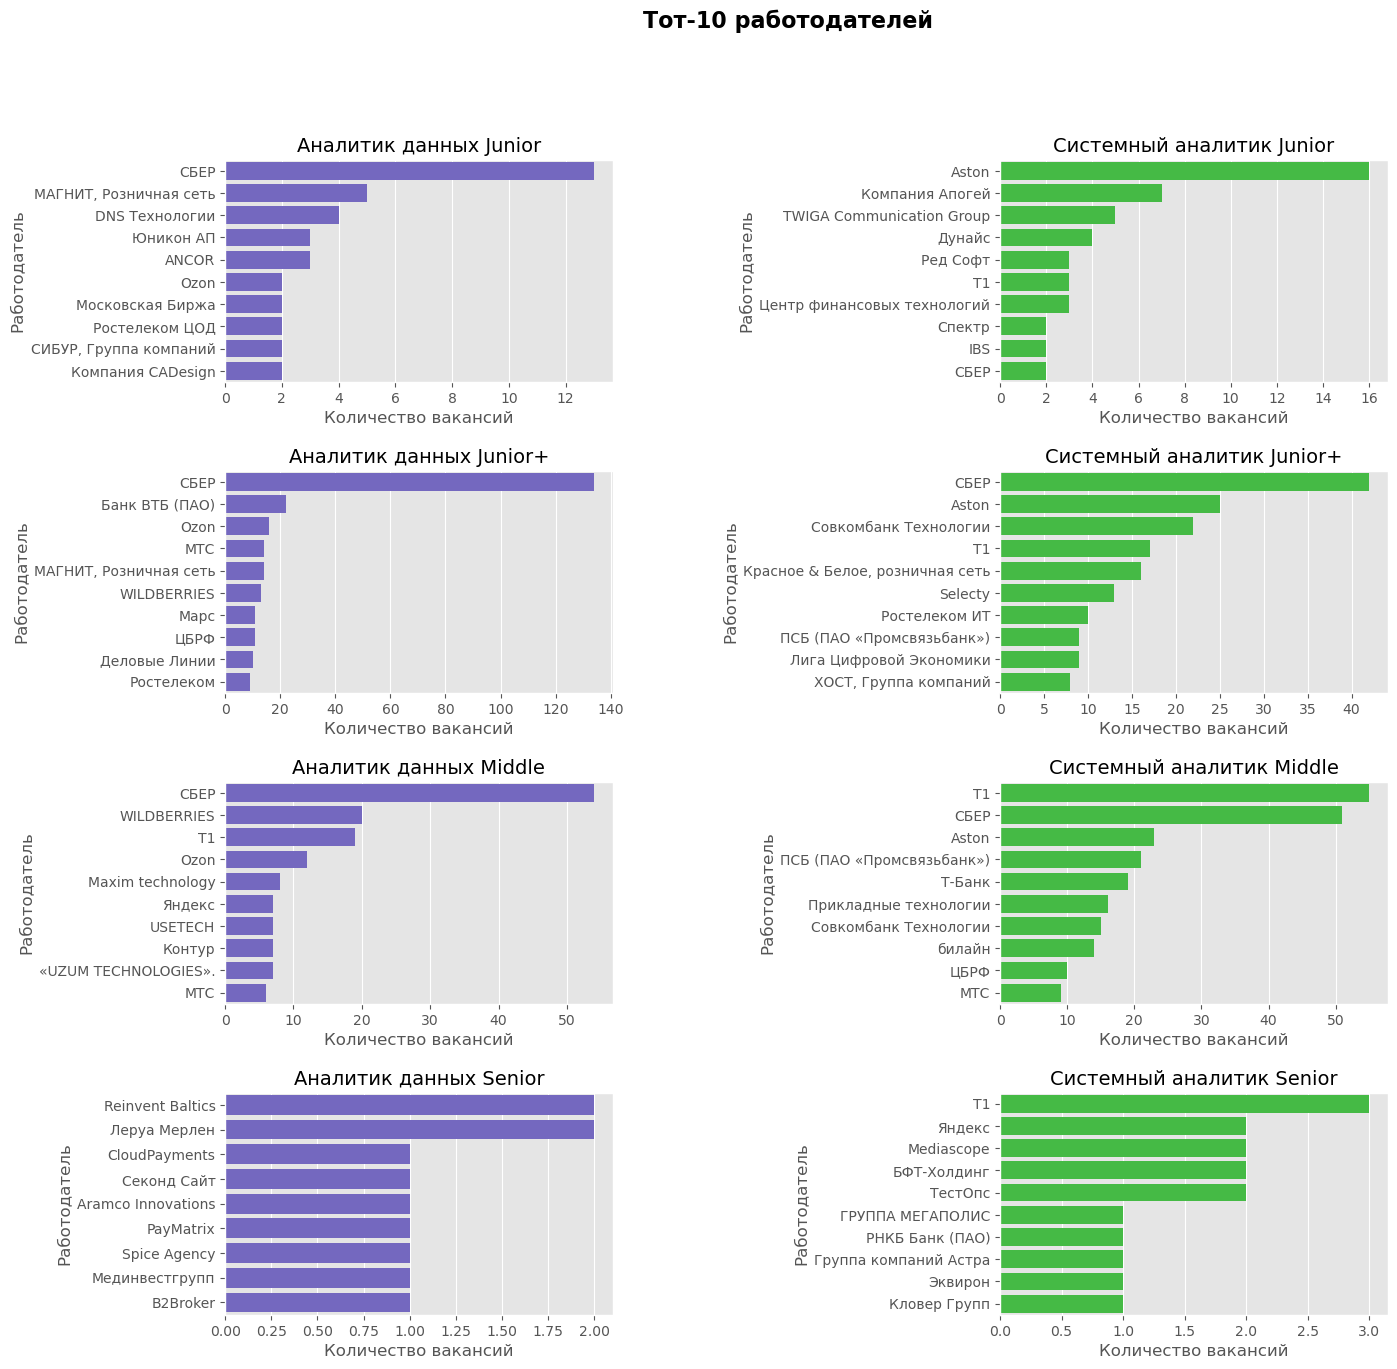

In [40]:
# Укоротим названия некоторых компаний для удобства отображения на графиках
vacancies1 = vacancies.replace('Ростелеком - Центры обработки данных', 'Ростелеком ЦОД')
vacancies1 = vacancies1.replace('Ростелеком Информационные Технологии', 'Ростелеком ИТ')
vacancies1 = vacancies1.replace('Компания Апогей (1С-франчайзи)', 'Компания Апогей')
vacancies1 = vacancies1.replace('Центральный банк Российской Федерации', 'ЦБРФ')
vacancies1 = vacancies1.replace('БФТ-Холдинг (Бюджетные и Финансовые Технологии)', 'БФТ-Холдинг') 


# Выведем графики
charts_per_grade(vacancies1, 'employer', 'Тот-10 работодателей', 'Работодатель')  

Как видим в разрезе по Грейдам лидером практически по всем категориям является СБЕР. Причем если смотреть на количество вакансий, то ищет он больше Аналитиков данных, чем Data Science.

В разрезе по грейдам к аналитикам данных основной интерес проявляют следующие компании, помимо СБЕРА:
- Junior - Магнит, DNS, Юникон АП, ANCOR и прочие
- Junior+ - ВТБ, Ozon, МТС, Магнит и прочие
- Middle - WILDBERRIES, Т1, Ozon и так далее
- Senior - Reinvent Baltics, Леруа Мерлен, CloudPayments

В разрезе по грейдам к системным аналитикам основной интерес проявляют следующие компании, помимо СБЕРА:
- Junior - Aston, Апогей, Twiga, Дунайс и прочие
- Junior+ - Aston, Совкомбанк, T1 и прочие
- Middle - Aston, Промсвязьбанк, Т-Банк и так далее
- Senior - Т1, Яндекс, Mediascope и другие

#### 3.3.2 Уровень заработной платы <a id="section_3_3_2"></a>

In [41]:
# Проверим вакансии в которых категория ЗП не указан а нижняя граница ЗП указана
vacancies.loc[
    (vacancies['salary_bin'] == 'ЗП не указана') & (vacancies['salary_from'].notna())
]['id'].count()

331

In [42]:
# Проверим вакансии, в которых категория ЗП не указана, а верхняя граница ЗП указана
vacancies.loc[
    (vacancies['salary_bin'] == 'ЗП не указана') & (vacancies['salary_to'].notna())
]['id'].count()

0

In [43]:
# Создадим функцию которая изменит категорию зарплат если установлена категори "ЗП не указана"
# а нижняя граница зарплаты заполнена
def salary_category(row: pd.Series):
  if row['salary_bin'] == 'ЗП не указана':
    if row.isna()['salary_from']:
      return 'ЗП не указана'
    elif row['salary_from'] < 100000:
      return 'Меньше 100 тысяч'
    elif row['salary_from'] >= 100000 and row['salary_from'] < 200000:
      return 'От 100 тысяч до 200 тысяч'
    elif row['salary_from'] >= 200000 and row['salary_from'] < 300000:
      return 'От 200 тысяч до 300 тысяч'
    else:
      return 'Больше 300 тысяч'
  else:
    return row['salary_bin']

In [44]:
# Обновим значения в столбце `salary_bin`
vacancies['salary_bin'] = vacancies.apply(salary_category, axis=1)

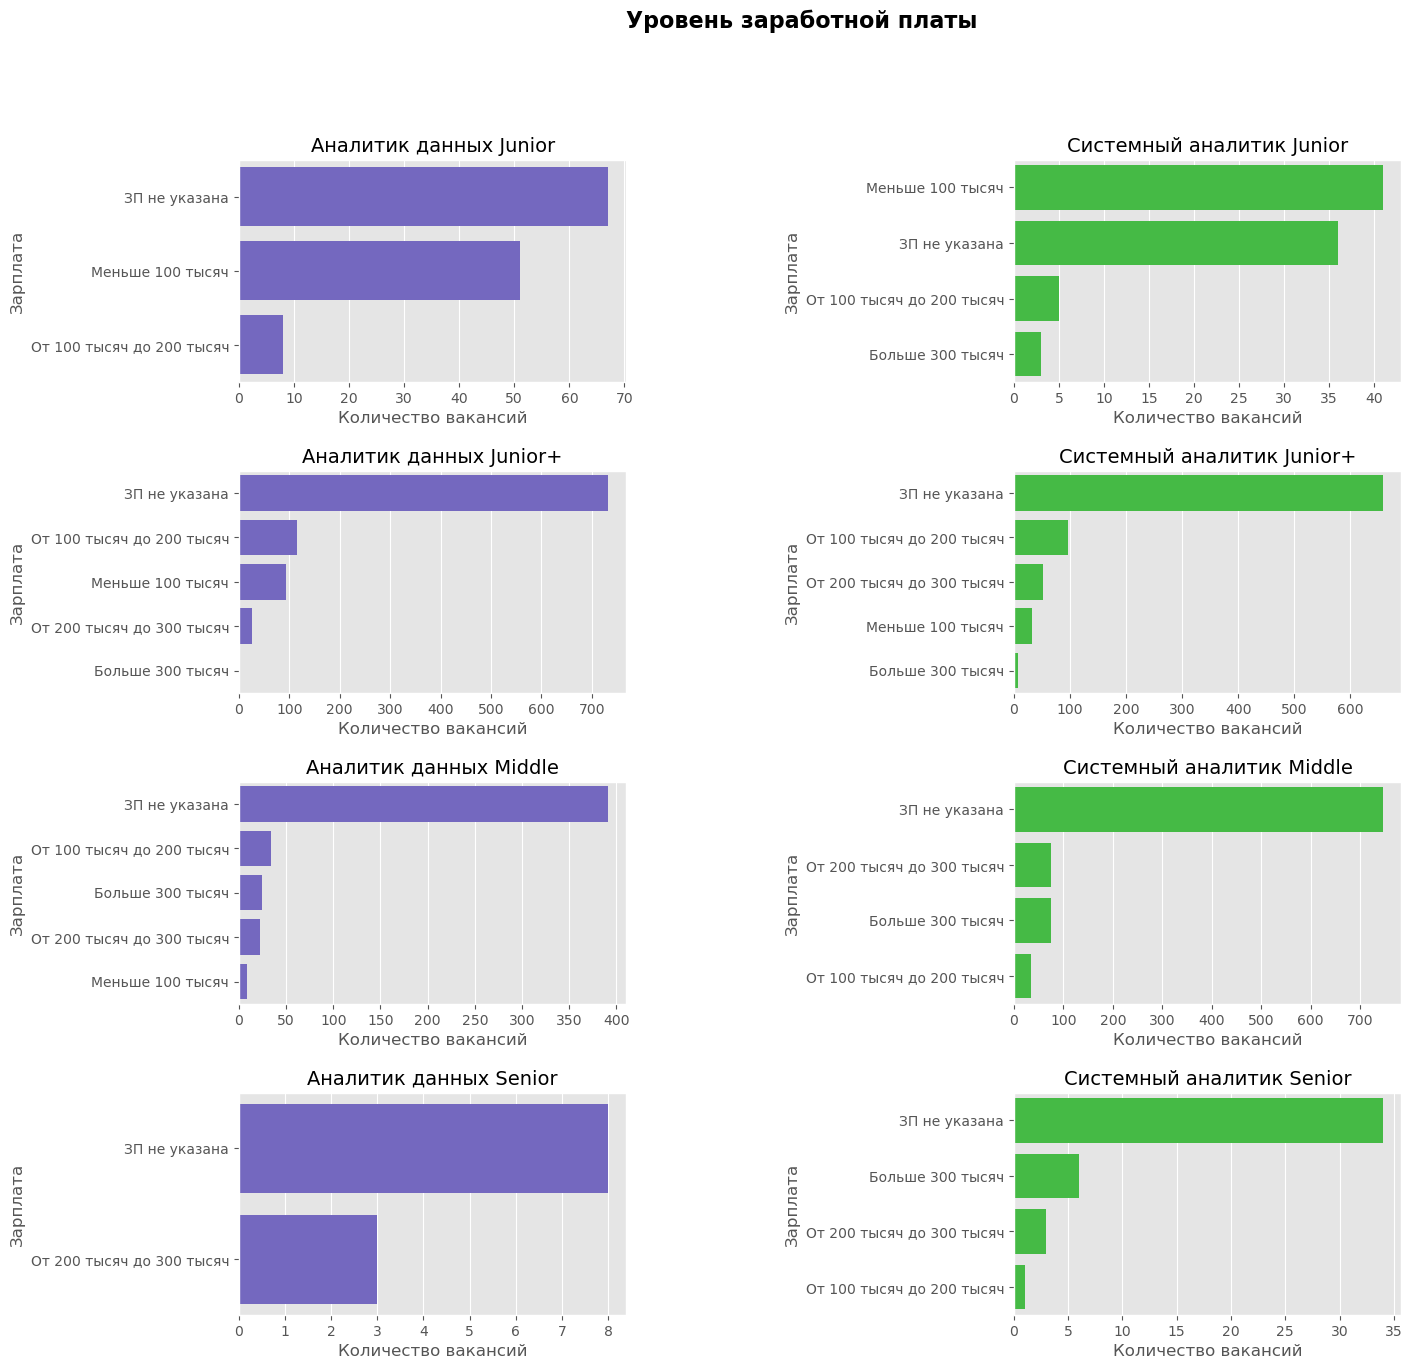

In [45]:
# Выведем графики
charts_per_grade(vacancies, 'salary_bin', 'Уровень заработной платы', 'Зарплата')  

По графикам видно, что в большинстве вакансий зарплата не указана.

Для аналитиков данных характерна следующая картина: 
- меньше 100 тыс. руб. предлагется только специалистам грейда Junior и Junior+
- от 100 до 200 тыс.руб. - такой уровень заработной платы характерен для специалистов грейда  Junior+, и редко для Middle
- от 200 до 300 тыс. руб. - такая заработная плата предлагается специалистам грейда Middle и Senior, и крайне редко Junior+
- более 300 тыс. руб. встречается у специалистов грейда Middle

Для системных аналитиков характерна следующая картина: 
- меньше 100 тыс. руб. предлагется только специалистам грейда Junior
- от 100 до 200 тыс.руб. - такой уровень заработной платы характерен для специалистов грейда  Junior+, и редко для Middle
- от 200 до 300 тыс. руб. - така заработная плата предлагается специалистам грейда Middle и Senior, и реже Junior+
- более 300 тыс. руб. встречается у специалистов грейда Middle и Senior

#### 3.3.3 Тип занятости <a id="section_3_3_3"></a>

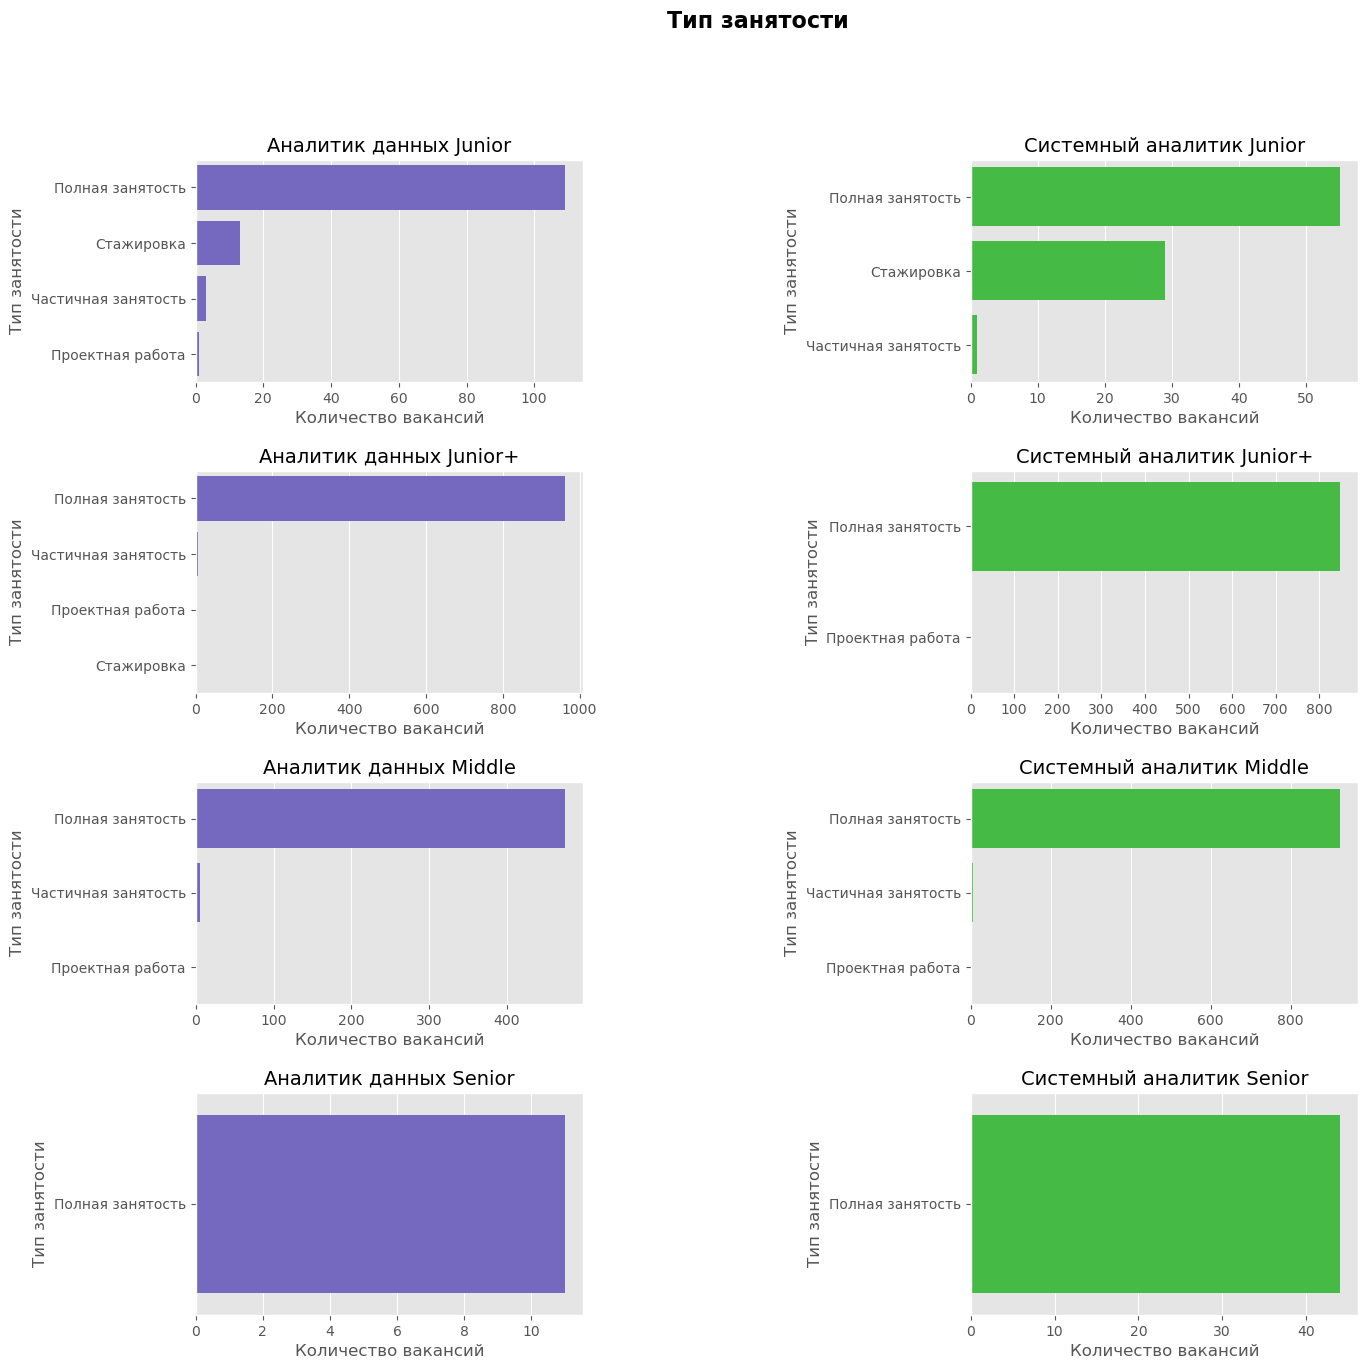

In [46]:
# Выведем графики
charts_per_grade(vacancies, 'employment', 'Тип занятости', 'Тип занятости')  

По графикам видна следующая картина:
- для всех грейдов Аналитика данных и системного аналитика основной тип занятости  - полный рабочий день
- для обеих профессий для грейда Junior предлагаются стажировки, чаще у системных аналитиков
- частиная занятость предлагается только для грейдов Junior, и крайне редко для специалистов грейда Middle

#### 3.3.4 График работы <a id="section_3_3_4"></a>

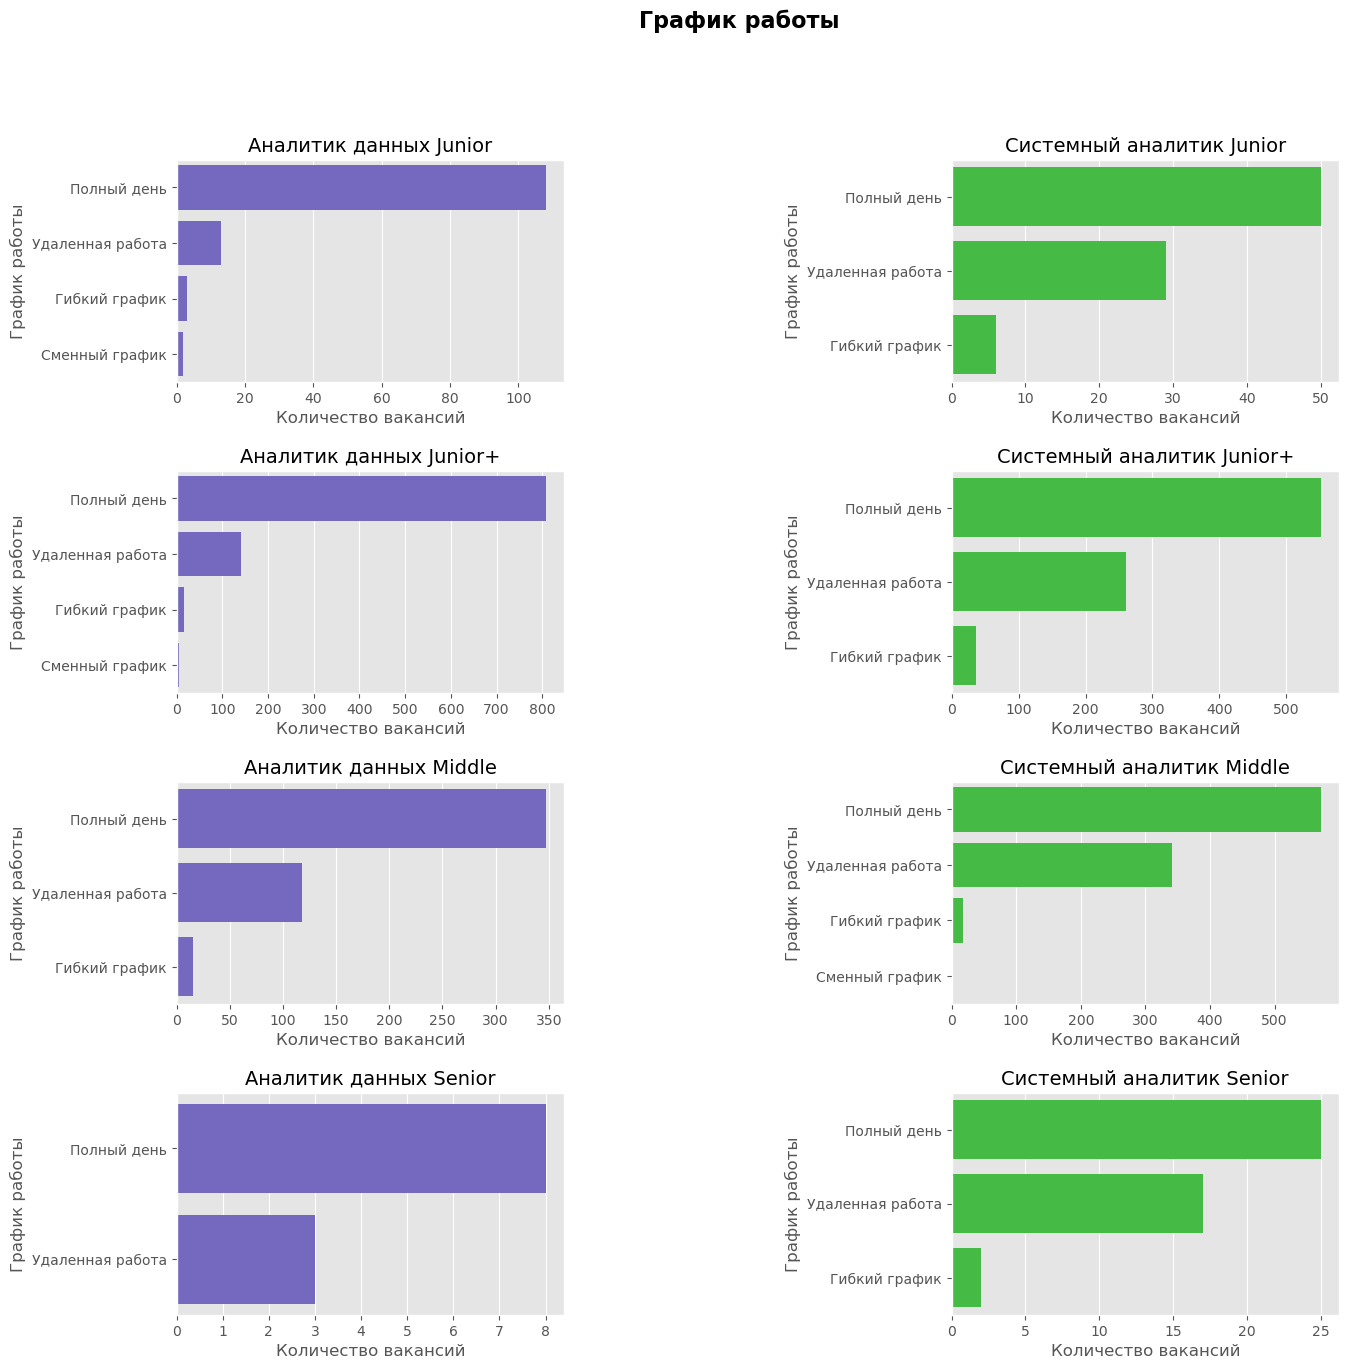

In [47]:
# Выведем графики
charts_per_grade(vacancies, 'schedule', 'График работы', 'График работы')  

По графикам можно сделать следующие выводы:
- для всех грейдов обеих специальностей характерен вы основном график работы - полный день.
- вакансий на удаленную работу намного меньше, и в основном это предложения для опытных специалистов - Junior+, Middle и Senior
- вакансии с гибким графиком работы стречаются редко для всех грейдов обеих специальностей

### 3.4 Определение наиболее востребованных навыков <a id="section_3_4"></a>

Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам:
- Какие навыки спрашивают чаще - твердые или мягкие. 
- К какому грейду и к какой специальности требований больше.
- Самые важные hard-skils
- Самые важные soft-skils. 

Проведем анализ отдельно для грейдов Junior, Junior+, Middle и Senior.

#### 3.4.1 Соотношение "твердых" и "мягких" навыков <a id="section_3_4_1"></a>

Определим, какие навыки спрашивают чаще - твердые или мягкие.<br>
Для этого выполним следующие шаги:
* Подсчитаем количество требуемых мягких и твердых навыков для каждой вакансии.
* Сгруппируем вакансии по грейду и профессии и посчитаем сумму значений количества навыков в каждой группе.
* Сравним полученные значения для мягких и твердых навыков по каждому грейду у аналитиков данных и системных аналитиков.

In [48]:
# Склеим значения из колонки `key_skills_from_key_skills_field` в одну строку, разделив их запятой
skills_str = ', '.join(vacancies['key_skills_from_key_skills_field'].dropna())

# Создадим список с уникальными навыками
skills_list = set([skill.strip().lower() for skill in skills_str.split(',')])

# Выгрузим список с навыками в файл, для ручной обработки
with open('skills_list.txt','w', encoding='utf-8') as f:
   f.write(str(skills_list)) 

In [49]:
# Составим вручную словарь мягких навыков, используя выгруженный файл
all_soft_skills = ["организаторские навыки","руководство командой","ответственность и пунктуальность","русский язык",
               "управление командой","английский — a1 — начальный","наставничество","амбициозность","доброжелательность",
               "английский — b1 — средний","ведение переговоров","желание работать и развиваться","внимательность к деталям",
               "креативность","навыки переговоров","мотивированность","переговоры","деловая коммуникация",
               "инициативность и лидерство","ответственность и пунктуальность","коммуникабельность","работа в команде",
               "английский язык (upper-intermediate)","умение легко находить контакт с людьми","целеустремленность",
               "умение работа в условиям многозадачности","точность и внимательность","аналитический склад ума",
               "• деловая коммуникация • общение с клиентами • работа в условиях многозадачности • опыт работы в ком",
               "развитые коммуникативные навыки","работа в режиме многозадачности","коммуникативные навыки","проактивность",
               "системность","деловое общение","расстановка приоритетов","ответственность","аналитическое мышление",
               "умение работать в условиях многозадачности","грамотная речь и письмо","коммуникативная гибкость",
               "скрупулезность","желание обучаться","логическое мышление","решение проблем","математический склад ума",
               "ориентация на результат","навыки межличностного общения","многозадачность","стрессоустойчивость","лидерство",
               "ведение клиентской базы","желание постоянно развиваться","желание развиваться",
               "высокий уровень самоорганизации","управленческие навыки","системное мышление","системный подход",
               "усидчивость","управление временем","умение работать в команде","внимательность","аналитические навыки",
               "грамотность","точность и внимательность к деталям","умение работать в коллективе",
               "инициативность в решении задач","генерация идей","критическое мышление","обучаемость","‒ активная позиция",
               "умение анализировать","желание зарабатывать","внимание к деталям","способность эффективно решать проблемы",
               "работа в условиях многозадачности","‒ системное мышление","умение принимать решения","добросовестность"]

In [50]:
# Функция подсчета количества мягких навыков
def count_soft_skills(skills_str):
    cnt = 0
    skills_list = [skill.strip().lower() for skill in skills_str.split(',')]
    for val in skills_list:
        if val in all_soft_skills:
            cnt += 1
    return cnt

# Функция подсчета количества твердых навыков
def count_hard_skills(skills_str):
    cnt = 0
    skills_list = [skill.strip().lower() for skill in skills_str.split(',')]
    for val in skills_list:
        if val not in all_soft_skills and val != 'nan':
            cnt += 1
    return cnt

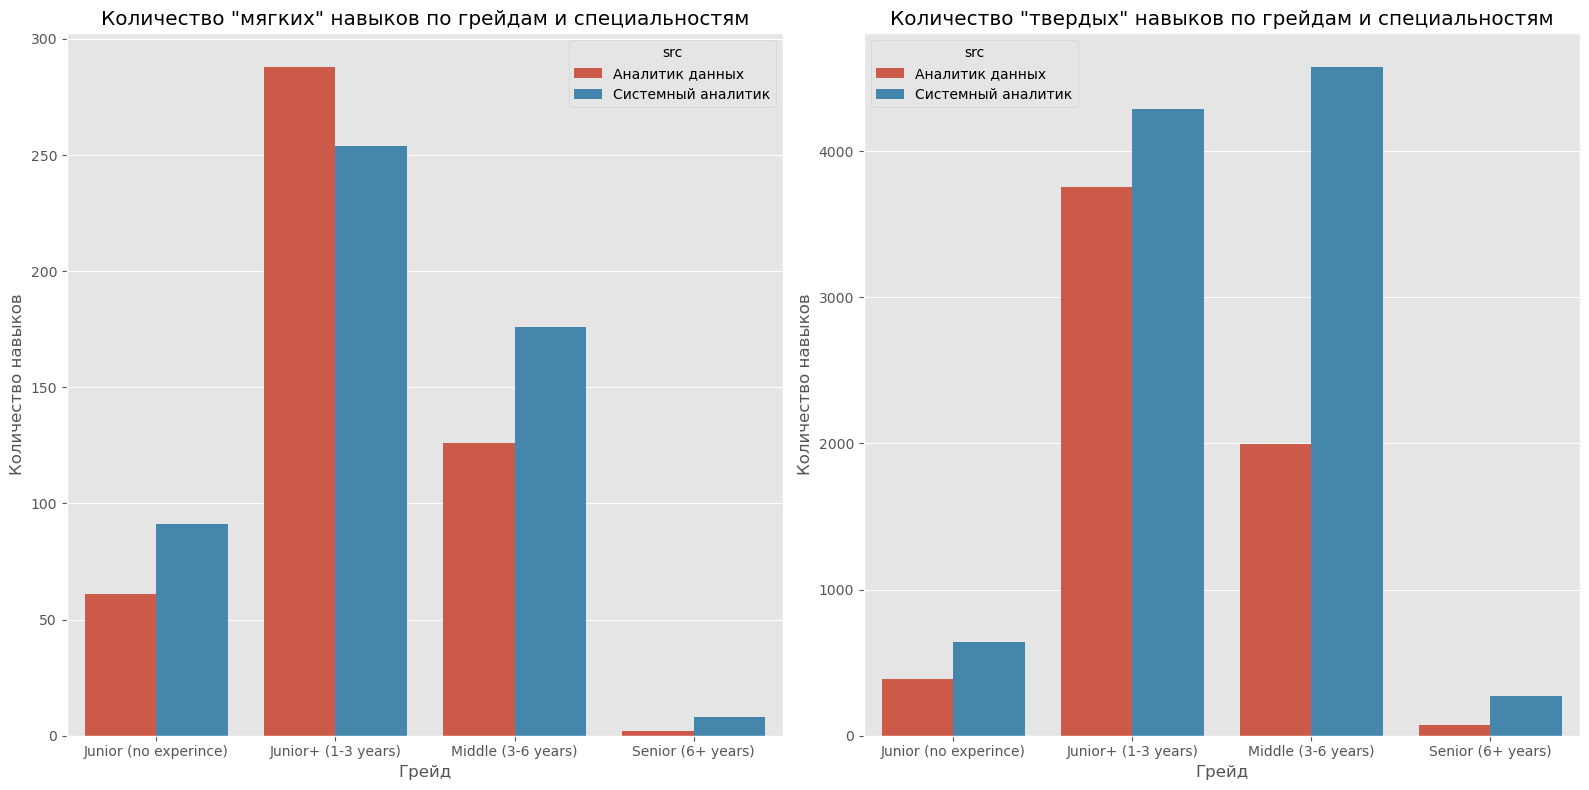

In [51]:
# Приведем значения навыков к строчному типу
vacancies['key_skills_from_key_skills_field'] = vacancies['key_skills_from_key_skills_field'].astype(str)

# Посчитаем количество мягких и твердых навыков для каждой вакансии
vacancies['soft_skills_count'] = vacancies['key_skills_from_key_skills_field'].apply(count_soft_skills)
vacancies['hard_skills_count'] = vacancies['key_skills_from_key_skills_field'].apply(count_hard_skills)

# Сгруппируем вакансии по грейду и специальности с подсчетом суммы навыков
vacancies_grp = vacancies.groupby(['src', 'experience']).agg({
    'soft_skills_count': 'sum',
    'hard_skills_count': 'sum'
}).reset_index()

# Построим графики
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x='experience', y='soft_skills_count', hue='src', data=vacancies_grp, ax=axes[0])
axes[0].set_title('Количество "мягких" навыков по грейдам и специальностям')
axes[0].set_xlabel('Грейд')
axes[0].set_ylabel('Количество навыков')

sns.barplot(x='experience', y='hard_skills_count', hue='src', data=vacancies_grp, ax=axes[1])
axes[1].set_title('Количество "твердых" навыков по грейдам и специальностям')
axes[1].set_xlabel('Грейд')
axes[1].set_ylabel('Количество навыков')

plt.tight_layout()
plt.show()

* Твердые навыки, предсказуемо, спрашивают чаще, чем мягкие
* Больше всего требований позиции June+
* Среди аналитиков больше твердых навыков спрашивают так же у June+
* А вот среди датасаентистов твердых навыков спрашивают больше у позиции Middle

#### 3.4.2 Соотношение количества требований <a id="section_3_4_2"></a>

Определим, к какому грейду и к какой специальности требований больше.

In [52]:
# Вычислим общее количество навыков для каждой вакансии
vacancies_grp['total_skills'] = vacancies_grp['soft_skills_count'] + vacancies_grp['hard_skills_count']

# Определим, к какому грейду и к какой специальности требований больше
vacancies_grp[vacancies_grp['total_skills'] == vacancies_grp['total_skills'].max()].head()

,src,experience,soft_skills_count,hard_skills_count,total_skills
6,Системный аналитик,Middle (3-6 years),176,4577,4753


#### 3.4.3 Наиболее востребованные навыки <a id="section_3_4_3"></a>

Определим самые важные "твердые" и "мягкие" навыки.

In [53]:
# Сгруппируем вакансии по профессии и грейду, а навыки сложим для каждой группы
vacancies_grp = vacancies.groupby(['src', 'experience']).agg({
    'key_skills_from_key_skills_field': ', '.join
}).reset_index()
vacancies_grp

,src,experience,key_skills_from_key_skills_field
0,Аналитик данных,Junior (no experince),"SQL, Power BI, Python, СУБД, Работа с базами д..."
1,Аналитик данных,Junior+ (1-3 years),"SQL, Power BI, Python, СУБД, BPMN, Clickhouse,..."
2,Аналитик данных,Middle (3-6 years),"Документация, Python, SQL, Математическая стат..."
3,Аналитик данных,Senior (6+ years),"SQL, Python, ETL, Tableau, Аналитические иссле..."
4,Системный аналитик,Junior (no experince),"nan, Аналитическое мышление, nan, Системный ан..."
5,Системный аналитик,Junior+ (1-3 years),"BPMN, UML, Английский язык, Системный анализ, ..."
6,Системный аналитик,Middle (3-6 years),"SQL, Аналитический склад ума, 1С, REST API, Ба..."
7,Системный аналитик,Senior (6+ years),"ERP, 1С: Управление Торговлей, Atlassian Jira,..."


In [54]:
# Напишем функции для определения Топ3 навыков

def get_top3_soft_skills(skills_str):   
    all_skills = [skill.strip().lower() for skill in skills_str.split(',')]
    soft_skills = []
    for val in all_skills:
        if val in all_soft_skills:
            soft_skills.append(val)
    top3_pre = Counter(soft_skills).most_common(3) 
    top3 = [i[0] for i in top3_pre]
    return ', '.join(top3)


def get_top3_hard_skills(skills_str):    
    all_skills = [skill.strip().lower() for skill in skills_str.split(',')]
    hard_skills = []
    for val in all_skills:
        if val not in all_soft_skills and val != 'nan':
            hard_skills.append(val)
    top3_pre = Counter(hard_skills).most_common(3) 
    top3 = [i[0] for i in top3_pre]
    return ', '.join(top3)

In [55]:
# Посчитаем Топ3 мягких и твердых навыков для каждой группы вакансий
vacancies_grp['top3_soft_skills'] = vacancies_grp['key_skills_from_key_skills_field'].apply(get_top3_soft_skills)
vacancies_grp['top3_hard_skills'] = vacancies_grp['key_skills_from_key_skills_field'].apply(get_top3_hard_skills)

pd.options.display.max_colwidth = 80
display(vacancies_grp[['src', 'experience', 'top3_soft_skills', 'top3_hard_skills']])

,src,experience,top3_soft_skills,top3_hard_skills
0,Аналитик данных,Junior (no experince),"аналитическое мышление, работа в команде, деловая коммуникация","sql, python, анализ данных"
1,Аналитик данных,Junior+ (1-3 years),"аналитическое мышление, аналитический склад ума, деловая коммуникация","sql, python, анализ данных"
2,Аналитик данных,Middle (3-6 years),"аналитическое мышление, критическое мышление, коммуникативная гибкость","sql, python, анализ данных"
3,Аналитик данных,Senior (6+ years),"проактивность, аналитическое мышление","sql, python, power bi"
4,Системный аналитик,Junior (no experince),"аналитическое мышление, аналитический склад ума, организаторские навыки","sql, системный анализ, бизнес-анализ"
5,Системный аналитик,Junior+ (1-3 years),"аналитическое мышление, системное мышление, работа в команде","bpmn, sql, uml"
6,Системный аналитик,Middle (3-6 years),"аналитическое мышление, системное мышление, работа в команде","sql, bpmn, системный анализ"
7,Системный аналитик,Senior (6+ years),"аналитическое мышление, логическое мышление, системное мышление","sql, bpmn, uml"


выводы:
- в
- выаы

## 4. Выводы и рекомендации <a id="section_4"></a>

jhgjkjklkh